# Анализ и прогнозирование временных рядов методами искусственного интеллекта

## **Практическая работа 2. Поиск по образцу.**

Смена рабочей директории.

In [7]:
import os
os.chdir('D:/2023-Kufarov-TimeSeriesCourse/practice/02 Similarity search')

Использование команд, которые автоматически перезагружают все импортированные модули при их изменении.

In [2]:
%load_ext autoreload
%autoreload 2

## **Часть 1.** Наивный алгоритм поиска по образцу.

Импорт библиотек и модулей.

In [3]:
import numpy as np
import pandas as pd
import time

from modules.utils import *
from modules.plots import *
from modules.bestmatch import *

### **Задача 1.**

В данной задаче вам предстоит самостоятельно реализовать наивный поиск top-$k$ похожих подпоcледовательностей временного ряда на заданный образец поиска.


Сначала выполните считывание временного ряда и образца поиска из файлов *ECG.csv* и *ECG_query.csv* соответственно, которые располагаются в директории *./datasets/part1*. Временной ряд представляет собой показания ЭКГ пациента, образец поиска – фрагмент ЭКГ, обозначающий кардиологическое заболевание. Необходимо по записи ЭКГ пациента определить, имеет ли он данное заболевание сердца.

In [4]:
def load_ts(file_name):

    ts = pd.read_csv(file_name, header=None, delim_whitespace=True)

    return ts

In [8]:
ts_url = './datasets/part1/ECG.csv'
query_url = './datasets/part1/ECG_query.csv'

ts = load_ts(ts_url).squeeze().to_numpy()
query = load_ts(query_url).squeeze().to_numpy()

Выполните визулизацию временного ряда и образца поиска с помощью функции `plot_bestmatch_data()` из модуля plots.py.

In [9]:
plot_bestmatch_data(ts, query)

Реализуйте самостоятельно наивный поиск top-$k$ подпоследовательностей временного ряда, похожих на образец поиска в смысле DTW меры. Для этого уже подготовлен шаблон класса `NaiveBestMatchFinder` в модуле *bestmatch.py*. Напишите метод `perform()`, выполняющий обнаружение подпоследовательностей ряда, похожих на образец поиска. При этом метод должен избегать попадания в результирующее множество пересекающихся подпоследовательностей. Воспользуйтесь функцией `_top_k_match()` из базового класса `BestMatchFinder`, которая возвращает top-$k$ похожих на образец поиска непересекающихся подпоследовательностей.

При реализации опирайтесь на псевдокод наивного алгоритма поиска, который представлен ниже.

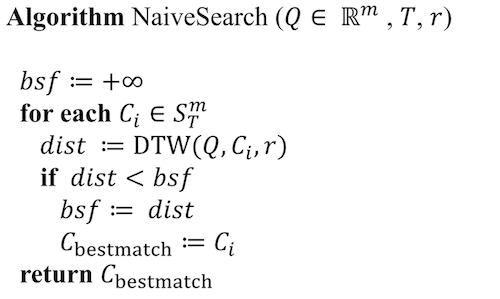

In [10]:
top_k = 2
r = 0.01
exclusion_zone = 1
normalize = True

naive_bestmatch_results = {}

model = NaiveBestMatchFinder(ts, query, exclusion_zone, top_k, normalize, r)
naive_bestmatch_results = model.perform()
naive_bestmatch_results

{'index': [1214, 192], 'distance': [13.926217775336449, 192.9575116412412]}

Напишите функцию `plot_bestmatch_results()` в модуле *plots.py* для визуализации найденных top-$k$ похожих подпоследовательностей временного ряда на образец поиска. За основу возьмите функцию `plot_bestmatch_data()` и добавьте отображение найденных подпоследовательностей, показанных тем же цветом, что и образец поиска.

In [11]:
plot_bestmatch_results(ts, z_normalize(query), naive_bestmatch_results)

In [12]:
plot_bestmatch_results(ts, query, naive_bestmatch_results)

In [13]:
plot_bestmatch_results(ts, query, naive_bestmatch_results)

### **Задача 2**.
Проведите эксперименты по исследованию длины образца поиска и ширины полосы Сако—Чиба на время выполнения наивного алгоритма. Длина временного ряда должна быть зафиксирована.

Для проведения экспериментов сгенерируйте временной ряд заданной длины и множество образцов поиска различных длин на основе модели случайных блужданий (функция `random_walk()` в *utils.py*).

In [14]:
n = 2000 # length of time series
m_list = [16, 32, 64, 128] # lengths of query

ts = random_walk(n)

query_list = []
for m in m_list:
    query_list.append(random_walk(m))

In [15]:
from ipywidgets import IntProgress
from IPython.display import display

top_k = 3
r_list = np.round(np.arange(0, 0.6, 0.1), 2)
exclusion_zone = 1
normalize = True

naive_times = np.zeros((len(r_list), len(m_list)))

bar = IntProgress(min=0, max=len(r_list)*len(m_list))
display(bar)

for i in range(len(r_list)):
    for j in range(len(query_list)):
        r = r_list[i]
        query = query_list[j]
        
        model = NaiveBestMatchFinder(ts, query, exclusion_zone, top_k, normalize, r)
        
        start = time.time()
        naive_bestmatch_results = model.perform()
        end = time.time()
        
        naive_times[i, j] = end - start
        
        bar.value += 1

IntProgress(value=0, max=24)

Постройте график зависимости времени выполнения наивного алгоритма от длины образца поиска временного ряда и ширины полосы Сако–Чиба.

In [16]:
x_title = 'Subsequence length, m'
y_title = 'Runtime, s'
plot_title = 'Runtime depending on subsequence length and warping window size'
trace_titles = np.array([f'r = {r}' for r in r_list])


mplot2d(m_list, naive_times, plot_title, x_title, y_title, trace_titles)

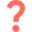
Проанализируйте и изложите содержательный смысл полученных
результатов.

**Время выполнения алгоритма увеличивается с увеличением ширины полосы Сако-Чиба, а также с увеличением размера query**